## Tarea 5 - Proyecto Análisis de Datos

En esta actividad, desarrollaremos un análisis de datos sobre el conjunto de datos del Titanic. Realizaremos un análisis exploratorio de datos (EDA) con el objetivo de identificar valores atípicos, características de nuestro conjunto de datos, tendencias y las relaciones que pueden existir entre las diferentes variables. Una vez tratados los valores faltantes y los valores atípicos, procederemos a seleccionar las características más relevantes para implementar un modelo de regresión logística, con el fin de predecir si un pasajero del Titanic sobrevivió o no al naufragio, a través de sus características principales.




## Librerías

Las librerías que vamos a utilizar son:

In [36]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, confusion_matrix

#Configuracion Graficas
# ==============================================================================
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4.5]
palette = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7"]
sns.set_theme( palette= palette, context= "notebook")

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# 1. Planteamiento del problema 

Tenemos un conjunto de datos que incluye características como la clase de los pasajeros del Titanic. Nuestro objetivo será crear un modelo de regresión logística que nos permita predecir si un pasajero sobrevivió o no al naufragio. Además, evaluaremos el desempeño del modelo a través de diversas métricas de bondad de ajuste.

# 2. Ingesta de datos

A continuación, vamos a ingresar el conjunto de datos que utilizaremos.

In [37]:
# Ingresamos el conjunto de datos a utilizar en el análisis de datos 
# ==============================================================================

df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 3. Resúmenes de Datos

A continuación, vamos a crear resúmenes de datos para empezar a comprender nuestro conjunto de datos.

In [38]:
# Impirmimos la información del conjunto de datos 
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Tenemos 891 registros y 12 variables las cuales son: 

- __PassengerId:__ Tiene el Id del pasajero, es un valor numérico incremental, único para cada pasajero. 

- __Survived:__ Indica si ese pasajero sobrevivió o no al naufragio, es un valor numérico donde 1 indica que si sobrevivió y 0 indica que no. 

- __Pclass:__ Indica la clase a la que pertenecía el pasajero, es un valor numérico de 1 a 3. 

- __Name:__ El nombre del pasajero, el tipo de dato es una cadena de caracteres. 

- __Sex:__ Indica el genero del pasajero, es una cadena de caracteres.

- __Age:__ Se refiere a los años que tiene el pasajero, es un valor numérico. 

- __SibSp:__ Indica el numero hermanos y/o Cónyuges en el Titanic, es un valor numérico. 

- __Parch:__ Indica el numero de padres y/o hijos en el Titanic, es un valor numérico. 

- __Ticket:__ Indica el código del boleto, es una cadena de caracteres.

- __Fare:__ Se refiere a la tarifa del pasajero, es un valor numérico. 

- __Cabin:__ Indica el número de cabina, es una cadena de caracteres. 

- __Embarked:__ Indica el puerto por el embarco, es una cadena de caracteres.

# 4. Valores Faltantes

A continuación, vamos a identificar qué variables tienen valores faltantes en nuestro conjunto de datos. Debemos tratarlos adecuadamente para poder entrenar el modelo de regresión logística de manera efectiva.

In [39]:
# Verificamos si existen valores nulos en el conjunto de datos
# ==============================================================================

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Podemos observar que las variables que tienen valores faltantes son:

- __Age:__ Tiene 177 Valores Faltantes.

- __Cabin:__  Tiene 687 valores Falantes.

- __Embarked:__ Tiene 2 Valores Faltantes

Una vez identificados los valores faltantes en cada una de las variables del conjunto de datos, procedemos a tratarlos de la forma más adecuada:

- __Age:__ Tiene 263 valores faltantes, lo que representa aproximadamente el 20% de los registros. Eliminar estos registros no es recomendable, por lo que utilizaremos la media para imputar los datos faltantes.

In [40]:
# Reemplazamos los valores nulos de la columna "Age" por la media de la misma
# ==============================================================================

df.fillna({'Age': df['Age'].mean()}, inplace=True)

- __Cabin:__ Tiene 687 valores faltantes. Vamos a observar cuantos valores unicos hay en esta columna

In [41]:
# Observamos cuantos valores únicos existen en la columna "Cabin"
# ==============================================================================

df["Cabin"].nunique()

147

Observamos que de los 204 valores que no son nulos en la variable **Cabin**, 147 son únicos. Esto indica que no hay un valor predominante en la variable, por lo que no sería recomendable reemplazar los valores faltantes por la moda. En su lugar, vamos a reemplazar todos los valores nulos de esta columna con el valor **"Desconocido"**.

In [42]:
# Reemplazamos los valores nulos de la columna "Cabin" por "Desconocido"
# ==============================================================================

df.fillna({'Cabin': 'Desconocido'}, inplace=True)

- __Embarked:__ Tiene 2 valores faltantes, una cantidad muy baja en comparación con el total de registros. Podemos eliminar estos registros sin ningún problema.

In [43]:
# Eliminamos las filas con valores nulos en la columna "Embarked"
# ==============================================================================

df.dropna(subset=['Embarked'], inplace=True)

Ahora vamos a comprobar si nuestro conjunto de datos ya no tiene valores faltantes que puedan afectar nuestro análisis y la posterior creación del modelo de regresión logística.

In [44]:
# Verificamos si existen valores nulos en el conjunto de datos
# ==============================================================================

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 5. Transformación de Características

A continuación, eliminaremos la variable __PassengerId__ debido a que, al ser un valor único e incremental, no nos aporta información de valor para la creación del modelo. Por lo tanto, resulta necesario eliminarlo de nuestro conjunto de datos para continuar con nuestro análisis.

In [45]:
# Eliminamos columnas que no aportan información relevante
# ==============================================================================

df.drop(['PassengerId'], axis=1, inplace=True)

# 6. Valores Atípicos

A continuación, vamos a graficar todas las variables Cuantitativas con el objetivo de identificar valores atípicos o extremos que puedan afectar nuestro análisis.

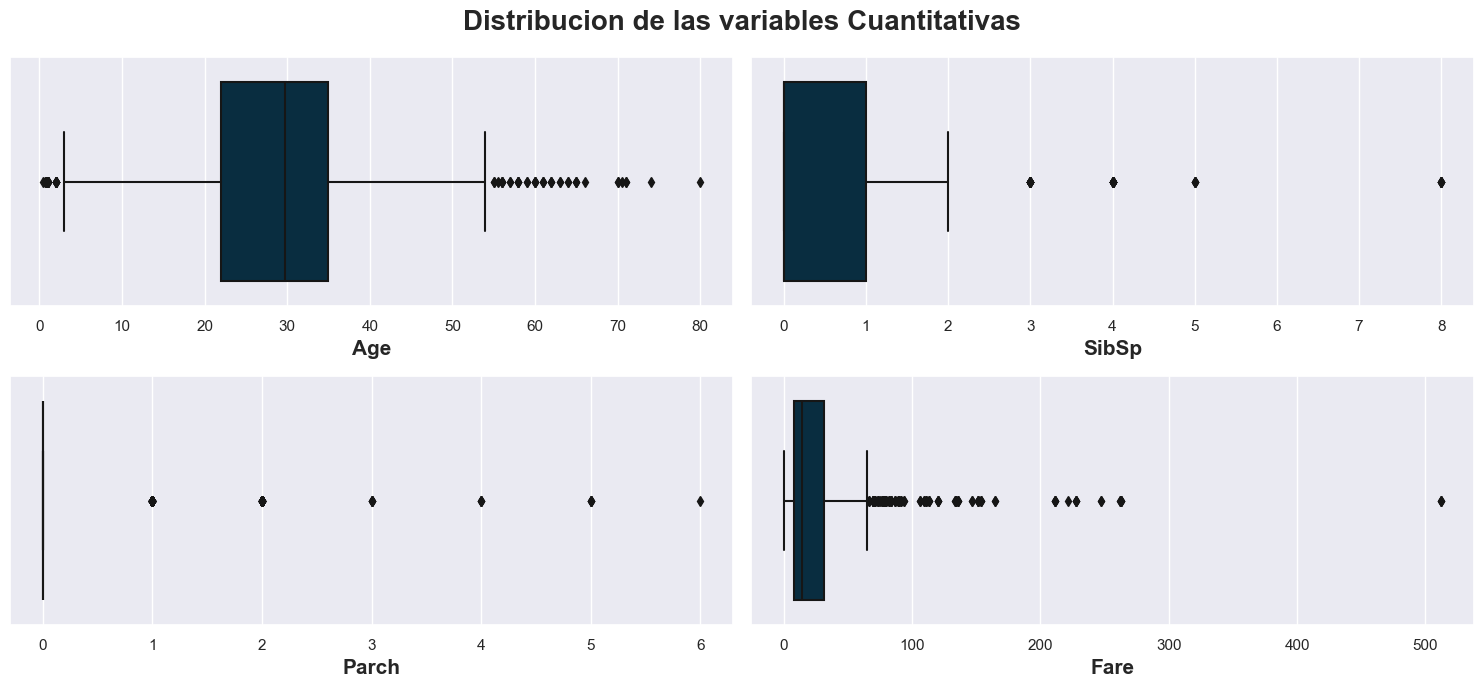

In [46]:
# Definimos las variables que vamos a graficar
# ==============================================================================

columnas_cuantitativas = ["Age","SibSp", "Parch", "Fare"]

# Creamos la matriz de graficas
# ======================================================
fig, axes = plt.subplots(2, 2, figsize=(15,7))

# Creamos cada grafica de caja de acuerdo a cada una de las variable
# ================================================================
for i in range(len(columnas_cuantitativas)):
    fila= i //2
    columna= i % 2
    sns.boxplot(data= df, x= columnas_cuantitativas[i], ax= axes[fila, columna])
    axes[fila, columna].set_xlabel(columnas_cuantitativas[i], fontweight= "bold", fontsize= 15)
fig.suptitle("Distribucion de las variables Cuantitativas", fontweight= "bold", fontsize= 20)
fig.tight_layout()

De los gráficos de cajas creados, podemos observar lo siguiente:

- La variable *Age* presenta algunos valores atípicos, sin embargo, como están dentro de un rango esperado y no hay errores en la medición, se considerarán como observaciones válidas.

- Con respecto a la variable *SibSp*, podemos observar que hay valores extremos que difieren en gran medida de las demás observaciones. Estos valores atípicos podrían ser muy influyentes en el modelo de regresión logística que vamos a crear, por lo que lo más recomendable será eliminarlos para mejorar el rendimiento del modelo.

- La variable *Parch* presenta varios valores atípicos. Sin embargo, la mayor parte de las observaciones se encuentra en el valor de 0, por lo que si eliminamos los demás valores, esta variable no estaría aportando ninguna información útil para el modelo de regresión logística. Por lo tanto, consideraremos los valores de la variable *Parch* como válidos.

- La variable *Fare* presenta algunas observaciónes que son extremas y está muy alejada de la distribución de las demás observaciones. Estas observaciones también pueden ser muy influyentes para el modelo de regresión logística, sesgando sus predicciones y generando un menor rendimiento en la capacidad predictiva del modelo. Por lo tanto, también vamos a eliminar esos valores extremo.

Ahora vamos a identificar el índice de las observaciones que son extremas en las variables SibSp y Fare.

In [47]:
# Detectamos las observaciones atípicas en las variables "SibSp" y "Fare" 
# ==============================================================================

observaciones_atipicas= df[(df["SibSp"] > 7) | (df["Fare"] > 500)]
observaciones_atipicas

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,0,3,"Sage, Master. Thomas Henry",male,29.699118,8,2,CA. 2343,69.5500,Desconocido,S
180,0,3,"Sage, Miss. Constance Gladys",female,29.699118,8,2,CA. 2343,69.5500,Desconocido,S
201,0,3,"Sage, Mr. Frederick",male,29.699118,8,2,CA. 2343,69.5500,Desconocido,S
258,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,Desconocido,C
324,0,3,"Sage, Mr. George John Jr",male,29.699118,8,2,CA. 2343,69.5500,Desconocido,S
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000000,0,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.000000,0,0,PC 17755,512.3292,B101,C
792,0,3,"Sage, Miss. Stella Anna",female,29.699118,8,2,CA. 2343,69.5500,Desconocido,S
846,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,Desconocido,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,Desconocido,S


Ahora que las hemos identificado, procedemos a eliminarlas.

In [48]:
# Eliminamos las observaciones atípicas del conjunto de datos 
# ==============================================================================

df.drop(observaciones_atipicas.index, inplace= True)

Ahora vamos a volver a realizar los diagramas de cajas para observar si efectivamente estos valores extremos han sido eliminados de manera adecuada.

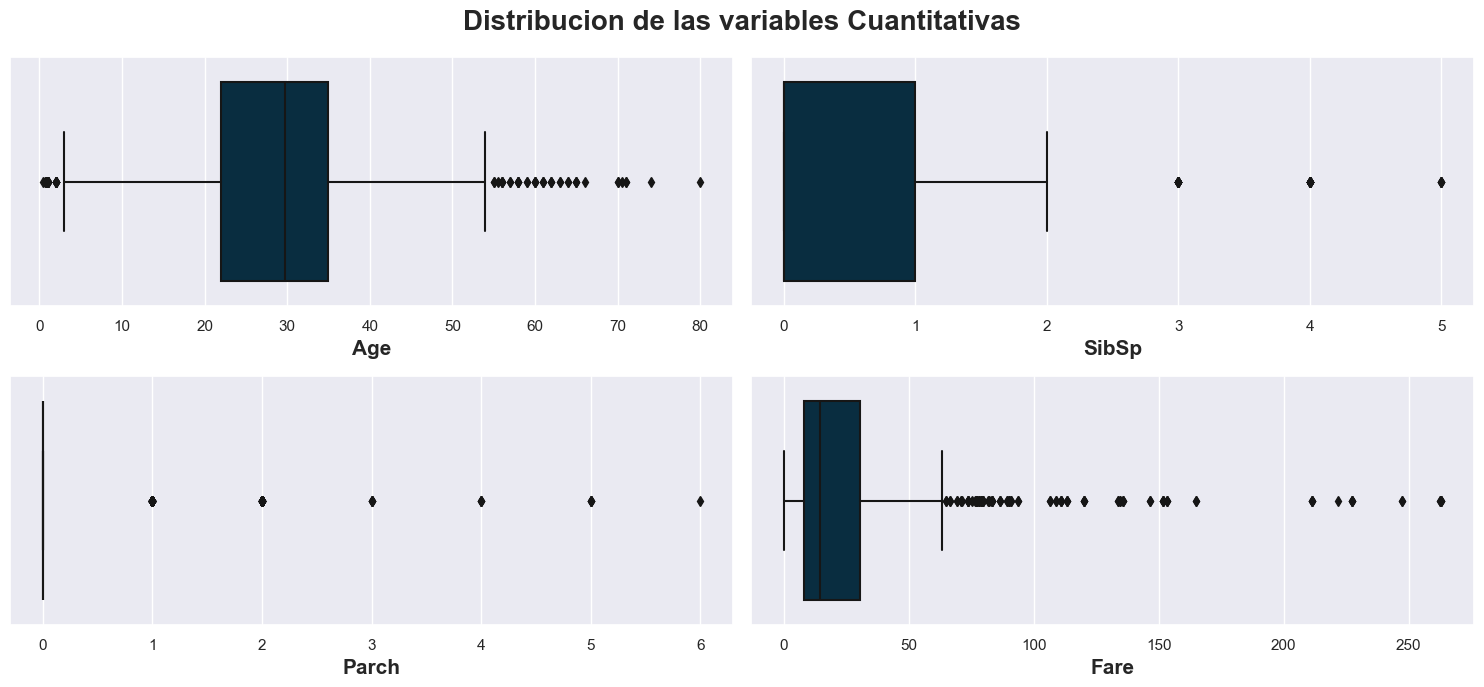

In [49]:
# Definimos las variables que vamos a graficar
# ==============================================================================

columnas_cuantitativas = ["Age","SibSp", "Parch", "Fare"]

# Creamos la matriz de graficas
# ======================================================
fig, axes = plt.subplots(2, 2, figsize=(15,7))

# Creamos cada grafica de caja de acuerdo a cada una de las variable
# ================================================================
for i in range(len(columnas_cuantitativas)):
    fila= i //2
    columna= i % 2
    sns.boxplot(data= df, x= columnas_cuantitativas[i], ax= axes[fila, columna])
    axes[fila, columna].set_xlabel(columnas_cuantitativas[i], fontweight= "bold", fontsize= 15)
fig.suptitle("Distribucion de las variables Cuantitativas", fontweight= "bold", fontsize= 20)
fig.tight_layout()

Como podemos observar, los valores que se consideraban extremos y estaban muy alejados de la distribución de cada variable han sido eliminados de manera adecuada.

# 7. Análisis Univariable de Variables Numéricas

A continuación realizaremos un análisis univariable sobre cada una de las variables numéricas, por medio de resúmenes de datos y representaciones gráficas como histogramas.

In [50]:
# Calculamos los estadisticos descriptivos de las variables cuantitativas
# ==============================================================================

df.describe(include=[np.number])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,0.383390,2.310580,29.633697,0.466439,0.369738,30.159399
std,0.486489,0.833668,13.037738,0.884413,0.797801,41.170677
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.400000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,30.285400
max,1.000000,3.000000,80.000000,5.000000,6.000000,263.000000


En cuanto a los estadísticos descriptivos de las variables cuantitativas, podemos observar lo siguiente:

- La media de los sobrevivientes es de 0.38. Dado que esta variable solo puede tomar valores de 1 o 0, podemos inferir que hubo una mayor cantidad de pasajeros que no sobrevivieron en comparación con los que sí.

- La media de la edad de los pasajeros es de 29.63 años, con un mínimo de 0.42 (menor a 1 año) y un máximo de 80 años.

- La media del número de hermanos y/o cónyuges a bordo del Titanic es de 0.466, con un máximo de 5.

- Respecto al número de padres y/o hijos presentes en el Titanic, la media es de 0.36, con un máximo de 6.

- La tarifa promedio pagada por los pasajeros para abordar el Titanic es de 30.15 unidades monetarias. El valor mínimo parece indicar que a algunos pasajeros no se les cobró tarifa, mientras que la tarifa máxima registrada fue de 263.

Ahora vamos a calcular los estadisticos descrirptivos de las variables cualitativas.

In [51]:
# Calculamos los estadisticos descriptivos de las variables cualitativas
# ==============================================================================

df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,879,879,879,879,879
unique,879,2,678,146,3
top,"Braund, Mr. Owen Harris",male,1601,Desconocido,S
freq,1,571,7,679,637


Al analizar los estadísticos descriptivos de las variables cualitativas, observamos lo siguiente:

- El Titanic tuvo una mayor cantidad de pasajeros hombres, con un total de 571.

- El puerto de embarque más utilizado fue la S (Southampton), con 637 pasajeros que abordaron desde allí.

- Respecto a las variables del nombre y el ticket, no aportan información significativa. En el caso de los nombres, cada observación es única, y en cuanto a los tickets, son muy pocos los que se repiten.
Entendido, aquí está la redacción:

Ahora procederemos a comprender la distribución de cada variable cuantitativa mediante histogramas y diagramas de frecuencia.

In [52]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

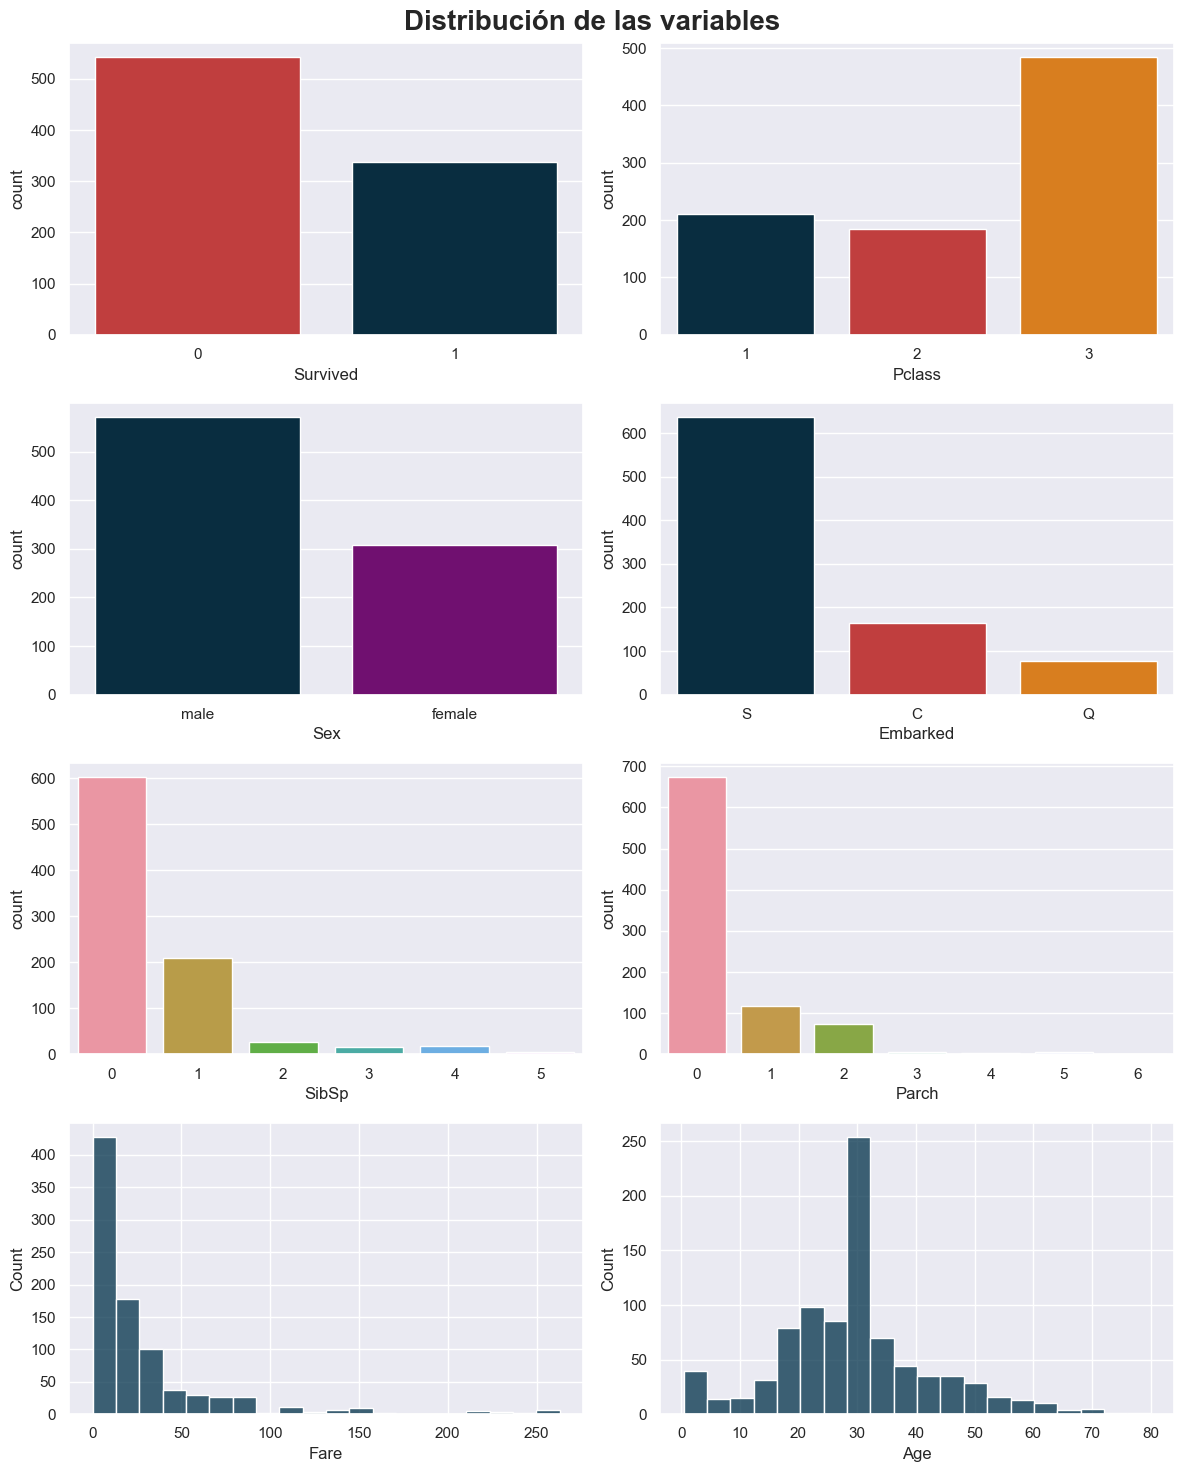

In [53]:
# Garficamos las distribuciones de las variables cualitativas 
# ==============================================================================

fig, axes = plt.subplots(4, 2, figsize=(12, 15))

sns.countplot(data= df, x= "Survived", ax= axes[0, 0], palette=[palette[1], palette[0]])
sns.countplot(data= df, x= "Pclass", ax= axes[0, 1])
sns.countplot(data= df, x= 'Sex', ax= axes[1, 0], palette=[palette[0], 'purple'])
sns.histplot(data= df, x= 'Age', ax= axes[3, 1], bins= 20)
sns.countplot(data= df, x= 'SibSp', ax= axes[2, 0])
sns.countplot(data= df, x= 'Parch', ax= axes[2, 1])
sns.histplot(data= df, x= 'Fare', ax= axes[3, 0], bins= 20)
sns.countplot(data= df, x= 'Embarked', ax= axes[1, 1])

fig.suptitle("Distribución de las variables", fontweight= "bold", fontsize= 20)

fig.tight_layout()

De las gráficas de distribución y de frecuencia, podemos observar lo siguiente:

- Como anticipamos al analizar las estadísticas descriptivas, la mayoría de los pasajeros no sobrevivió, como lo refleja la distribución de la variable de supervivencia.

- La tercera clase tuvo la mayor cantidad de pasajeros, seguida por la primera clase, aunque esta última está cerca en cantidad de pasajeros a la segunda clase.

- La proporción de pasajeros masculinos es aproximadamente el doble que la de pasajeros femeninos.

- En cuanto al puerto de embarque, S (Southampton) tuvo la mayor cantidad de pasajeros, seguido por C (Cherbourg), mientras que Q (Queenstown) tuvo la menor cantidad.

- La mayoría de los pasajeros viajaban solos, ya que tenían cero hermanos/cónyuges o padres/hijos a bordo.

- En términos de tarifa, la mayoría de los pasajeros pagaron menos de 50 unidades monetarias para abordar el Titanic.

- La distribución de edades muestra cierta similitud con una distribución normal, con una concentración alrededor de los 30 años, aunque con cierta variabilidad.

# 8. Análisis Bivariable

Ahora procederemos a realizar un análisis bivariable para explorar las relaciones entre cada par de variables en nuestro conjunto de datos. Este análisis nos permitirá comprender mejor la interacción entre las diferentes variables y cómo se relacionan entre sí.

<Axes: xlabel='Survived', ylabel='count'>

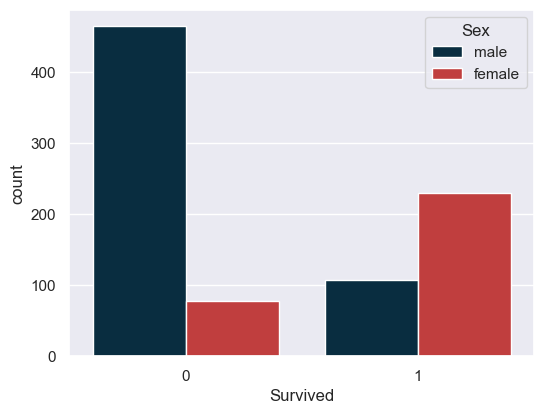

In [54]:
# Realizamos un conteo de los sobrevivientes por sexo
# ==============================================================================

sns.countplot(data= df, x= "Survived", hue= "Sex")

De la gráfica anterior, podemos observar lo siguiente:

- La mayoría de las personas que no sobrevivieron al naufragio del Titanic eran del género masculino, mientras que la mayoría de las personas que sobrevivieron eran del género femenino.

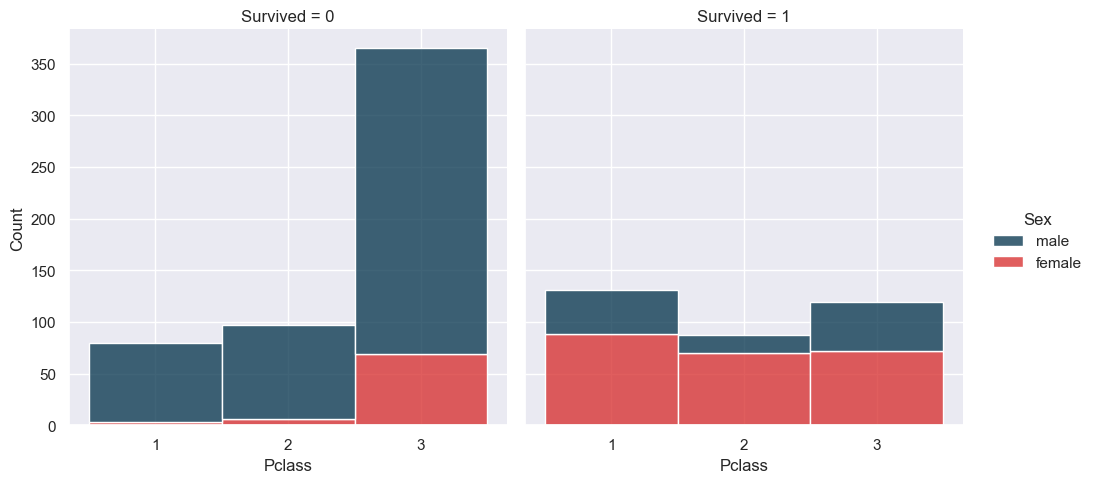

In [55]:
# Realizamos un conteo de los sobrevivientes por clase
# ==============================================================================

sns.displot(data= df, x= "Pclass", hue= "Sex", discrete=True, multiple= "stack", bins= 20, col= "Survived")
plt.xticks([1, 2, 3]);

Podemos observar que la mayor cantidad de personas que no sobrevivieron eran hombres de tercera clase. Además, es notable que hubo muy pocas mujeres de primera o segunda clase que no sobrevivieron al naufragio del Titanic. También podemos observar que la menor cantidad de hombres que sobrevivieron fueron los de segunda clase

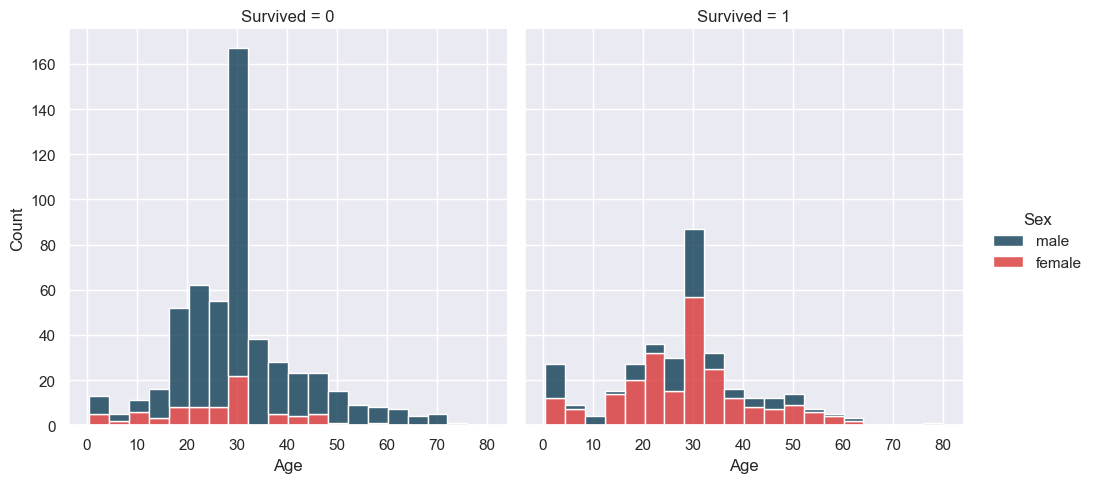

In [56]:
# Realizamos un conteo de los sobrevivientes por edad
# ==============================================================================

sns.displot(data=df, x="Age", hue= 'Sex', col= 'Survived', multiple= "stack", bins= 20)

Al analizar la distribución de las personas que sobrevivieron y las que no en función de su edad, observamos que la mayor cantidad de mujeres que sobrevivieron se encuentran alrededor de los 30 años. Del mismo modo, la mayoría de hombres que no sobrevivieron también tienen alrededor de 30 años.

# 9. Selección de Características

Las siguientes variables no serán seleccionadas para el modelo de regresión logística:

- **Nombre:** No vamos a utilizar esta variable ya que es única para cada pasajero y no aportaría ninguna información relevante al modelo de regresión logística.
- **Ticket:** Esta variable indica el código del boleto, por lo que no es una característica intrínseca asociada al pasajero y no ayudaría a predecir si un pasajero sobrevivió o no al naufragio del Titanic.
- **Cabin:** Dado que la mayoría de las observaciones en esta variable incialmente eran valores nulos, no es recomendable utilizarla, ya que estos valores pueden no ser útiles en la predicción del modelo de regresión logística.

Entonces, las variables que vamos a seleccionar para predecir si un pasajero logró sobrevivir o no al naufragio del Titanic son:

- Pclass
- Sex
- Age
- SibSp
- Parch
- Fare
- Embarked

In [57]:
# Seleccionamos el conjunto de caracteristicas
# ==============================================================================

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

Asimismo, vamos a seleccionar la variable *"Survived"* como la variable de respuesta.

In [58]:
# Seleccioamos la variable objetivo
# ==============================================================================

y = df['Survived']

# 10. Codificación de Variables Categóricas

Se realiza un mapeo numérico de las variables cualitativas *"Sex"* y *"Embarked"* , mediante la librería de *pandas*.

In [59]:
# Convertimos las variables categóricas en variables dummy
# ==============================================================================

X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,True,False,True
1,1,38.000000,1,0,71.2833,False,False,False
2,3,26.000000,0,0,7.9250,False,False,True
3,1,35.000000,1,0,53.1000,False,False,True
4,3,35.000000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,True,False,True
887,1,19.000000,0,0,30.0000,False,False,True
888,3,29.699118,1,2,23.4500,False,False,True
889,1,26.000000,0,0,30.0000,True,False,False


# 11. Dividimos nuestro conjunto en datos de entrenamiento y test
Ahora procederemos a dividir nuestro conjunto de datos en datos de entrenamiento, que serán utilizados para alimentar el modelo durante su proceso de entrenamiento, y datos de prueba, que servirán para evaluar la precisión y el rendimiento del modelo. Utilizaremos una proporcion de $75\%$ para los datos de entrenamiento y el $25\%$ restante para los datos de prueba

In [60]:
# Dividimoslos datos en conjuntos de entrenamiento y prueba
# ==============================================================================

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)
print(f"Dimensiones del X_train: {X_train.shape}")
print(f"Dimensiones del X_test: {X_test.shape}")
print(f"Dimensiones del y_train : {y_train.shape}")
print(f"Dimensiones del y_test: {y_test.shape}")

Dimensiones del X_train: (659, 8)
Dimensiones del X_test: (220, 8)
Dimensiones del y_train : (659,)
Dimensiones del y_test: (220,)


# 12. Escalamos nuestro conjunto de caracteristicas

La estandarización con el mismo escalador para ambos conjuntos de caracteristicas, de entrenamiento y prueba, es crucial por varias razones. Primero, garantiza la consistencia en la transformación de las características, asegurando que todas estén en la misma escala. Esto es esencial para mantener la integridad de las relaciones entre las características y evitar sesgos en el modelo.

In [61]:
# Escalamos las características con StandardScaler
# ==============================================================================

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 13. Entrenamiento del modelo

A continuación, realizaremos el entrenamiento del modelo utilizando el conjunto de datos de entrenamiento.

In [62]:
# Crear el modelo de regresión logística
Logistic_model = LogisticRegression(solver='liblinear')
Logistic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Una vez entrenado el modelo, vamos a calcular las predicciones basadas en el conjunto de características de prueba para, posteriormente, comparar el rendimiento del modelo de regresión logística.

In [63]:
predicciones_modelo = Logistic_model.predict(X_test)
predicciones_modelo

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

# 14. Evaluación de Desempeño del Modelo

Ahora vamos a evaluar el rendimiento del modelo con el conjunto de datos de prueba utilizando diversas métricas como precisión, recall y F1-Score

In [64]:
# Calculamos las metricas de bondad del modelo de regresión logística 
# ==============================================================================

print(classification_report(y_test, predicciones_modelo))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       133
           1       0.66      0.70      0.68        87

    accuracy                           0.74       220
   macro avg       0.73      0.73      0.73       220
weighted avg       0.74      0.74      0.74       220



De las métricas de bondad de ajuste del modelo de regresión logística, podemos observar lo siguiente:

- La precisión, que se refiere a las predicciones correctas del modelo, ya sea que un pasajero haya sobrevivido al naufragio o no, muestra que el 80% de las predicciones de no supervivencia realizadas por el modelo fueron correctas. Por otro lado, de todos los pasajeros que realmente no sobrevivieron, el modelo logró identificar correctamente el 77% de todas las predicciones.

- El valor de recall en las personas que no sobrevivieron es del 77%, lo que indica que el 77% de las personas que realmente no sobrevivieron fueron correctamente identificadas por el modelo de regresión. Esto implica que el 23% de las personas que no sobrevivieron fueron clasificadas incorrectamente como sobrevivientes en el modelo de regresión. Además, el valor obtenido de la métrica recall en las personas que sí sobrevivieron es del 70%, lo que indica que el 70% de las personas que sobrevivieron fueron correctamente identificadas por el modelo, mientras que el 30% restante de las personas que sobrevivieron fue clasificada de manera incorrecta por el modelo.

- El F1-Score proporciona una puntuación única que equilibra la precisión y el recall. Aquí, la puntuación F1 para la clase 1, que corresponde a si un pasajero sobrevivió, es de 0.68, lo que sugiere que el modelo tiene un rendimiento moderado.

- La exactitud nos indica la proporción de resultados verdaderos, tanto positivos como negativos, divididos por el número total de casos examinados. Obtenemos un valor del 74%, lo que sugiere que el modelo tiene un buen rendimiento ante valores no vistos previamente.

# 15. Matriz de Confusión del Modelo

A continuación, crearemos la matriz de confusión del modelo, la cual nos permite evaluar el rendimiento de un modelo de clasificación en un aprendizaje supervisado.

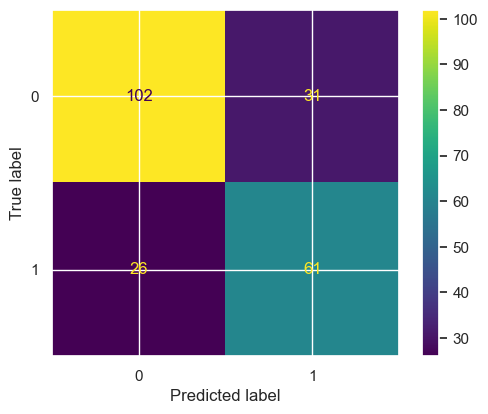

In [65]:
# Creamos la matriz de confusión
# ==============================================================================

cm = confusion_matrix(y_test.values.reshape(-1), predicciones_modelo.reshape(-1))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, )

disp.plot();

De la matriz de confusión podemos observar lo siguiente:

- **Verdaderos Negativos (TN)**: El modelo predijo correctamente que 102 pasajeros no sobrevivieron.

- **Verdaderos Positivos (TP)**: El modelo de regresión logística acertó en 61 casos al predecir que los pasajeros sobrevivieron.

- **Falsos Positivos (FP)**: El modelo clasificó incorrectamente a 31 pasajeros como sobrevivientes, cuando en realidad no lo eran.

- **Falsos Negativos (FN)**: Hubo 26 casos en los que el modelo clasificó incorrectamente a pasajeros como no sobrevivientes, cuando en realidad sí habían sobrevivido al naufragio del Titanic.

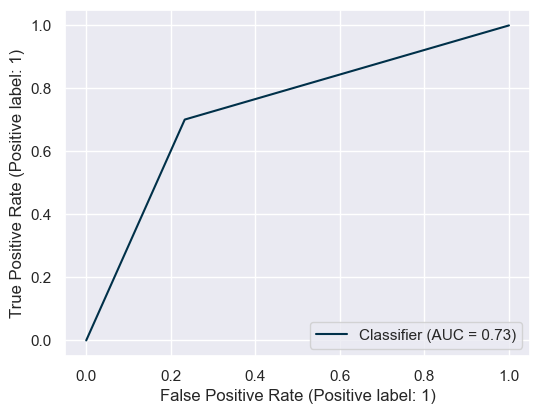

In [66]:

# Creamos la curva ROC
RocCurveDisplay.from_predictions(y_test, predicciones_modelo)
plt.show()   